# Machine learning summative assessment - Airline Avionics

## Task 1 Import and clean data

### Import Libraries

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split   # for test train Split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import linear_model                       # for linear regression modeling
from sklearn import preprocessing                      # for preprocessing like imputting missing values
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

### Load the data

Load both the ml_summative_raw.csv.

In [3]:
# read data file 
data = pd.read_csv('ml_summative_raw.csv')

In [4]:
data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


#### Clean data

In [5]:
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                     65504
Spin-Up Time                                                                                   2
Start/Stop Count                                                                               2
Reallocated Sectors Count                                                                      2
Seek Error Rate               

In [6]:
data.dtypes

Unnamed: 0                                                                                   int64
date                                                                                        object
serial_number                                                                               object
model                                                                                       object
capacity_bytes                                                                               int64
failure                                                                                      int64
Throughput Performance                                                                     float64
Spin-Up Time                                                                               float64
Start/Stop Count                                                                           float64
Reallocated Sectors Count                                                                  float64
Seek Error

In [7]:
data = data.fillna(data.median(axis=0))

In [8]:
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                         0
Spin-Up Time                                                                                   0
Start/Stop Count                                                                               0
Reallocated Sectors Count                                                                      0
Seek Error Rate               

### Dropping columns

I dropped 'Unnamed: 0', 'date', 'serial_number', 'Soft Read Error Rate', 'smart_15', 'Current Helium Level' & 'Soft Read Error Rateor'.

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('serial_number', axis=1, inplace=True)

data.drop('Soft Read Error Rate', axis=1, inplace=True)
data.drop('smart_15', axis=1, inplace=True)
data.drop('Current Helium Level', axis=1, inplace=True)
data.drop('Soft Read Error Rateor', axis=1, inplace=True)

In [10]:
data.head()

,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,ST4000DM000,4000787030016,0,133.0,96.0,100.0,100.0,77.0,113.0,99.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,114.0
1,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,100.0,113.0,99.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,100.0
2,ST4000DM000,4000787030016,0,133.0,91.0,100.0,100.0,84.0,113.0,81.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,120.0
3,ST4000DM000,4000787030016,0,133.0,91.0,100.0,100.0,88.0,113.0,76.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,117.0
4,WDC WD20EFRX,2000398934016,0,133.0,100.0,100.0,200.0,100.0,113.0,86.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,200.0


#### Data statistics

In [11]:
data.describe()

,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
count,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,3.666340e+12,0.018594,132.626461,102.174644,99.985612,109.127818,93.192333,113.980061,83.165500,101.145162,...,80.997844,100.0,99.960841,100.078531,100.078531,1.001318,1.026354,1.383455,100.078531,118.833520
std,1.423955e+12,0.135089,12.304060,21.577020,0.481049,31.055141,26.428773,12.745218,13.571582,13.167475,...,0.828614,0.0,0.993227,2.801248,2.801248,0.361184,1.615060,6.149434,2.801248,28.291613
min,-1.000000e+00,0.000000,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,...,56.000000,100.0,71.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,15.275819
25%,4.000787e+12,0.000000,133.000000,92.000000,100.000000,100.000000,84.000000,113.000000,74.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,111.000000
50%,4.000787e+12,0.000000,133.000000,95.000000,100.000000,100.000000,87.000000,113.000000,85.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,116.000000
75%,4.000787e+12,0.000000,133.000000,98.000000,100.000000,100.000000,90.000000,113.000000,94.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,118.000000
max,8.001563e+12,1.000000,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,...,98.000000,100.0,100.000000,200.000000,200.000000,100.000000,100.000000,100.000000,200.000000,200.000000


In [12]:
data.index

RangeIndex(start=0, stop=75130, step=1)

In [13]:
data.shape

(75130, 43)

## Task 2 Inspect and visualize the data

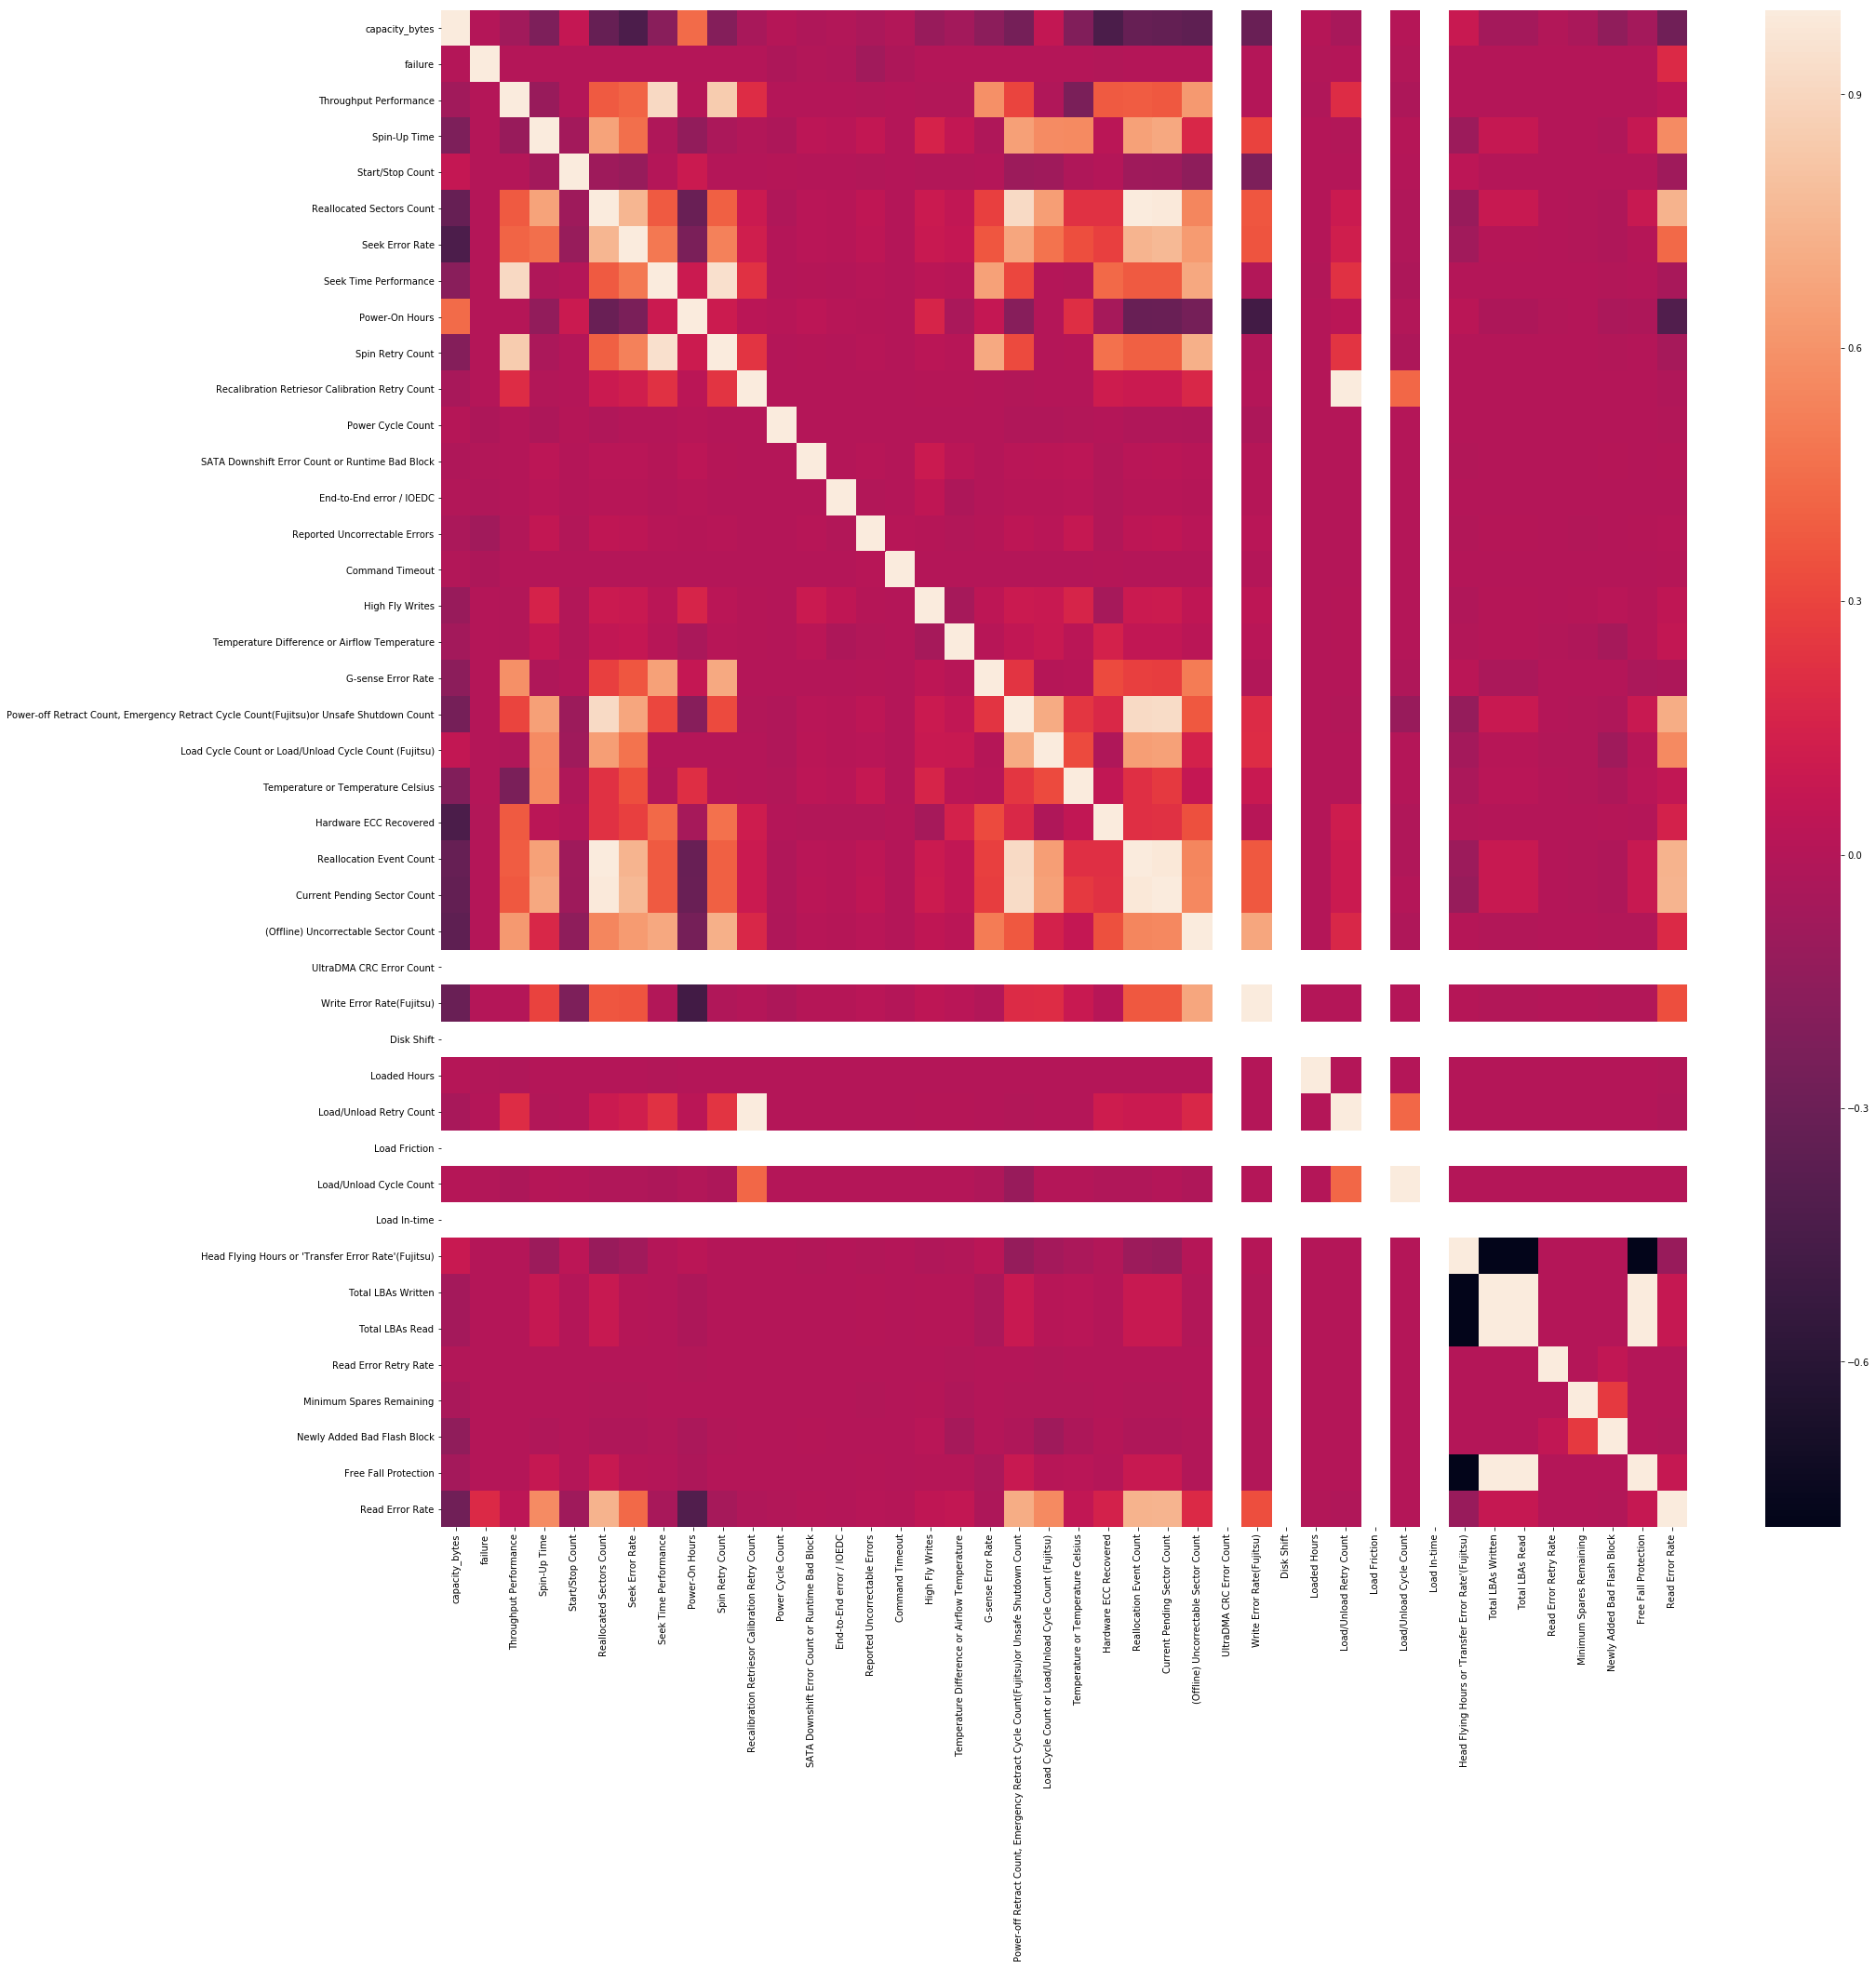

In [14]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

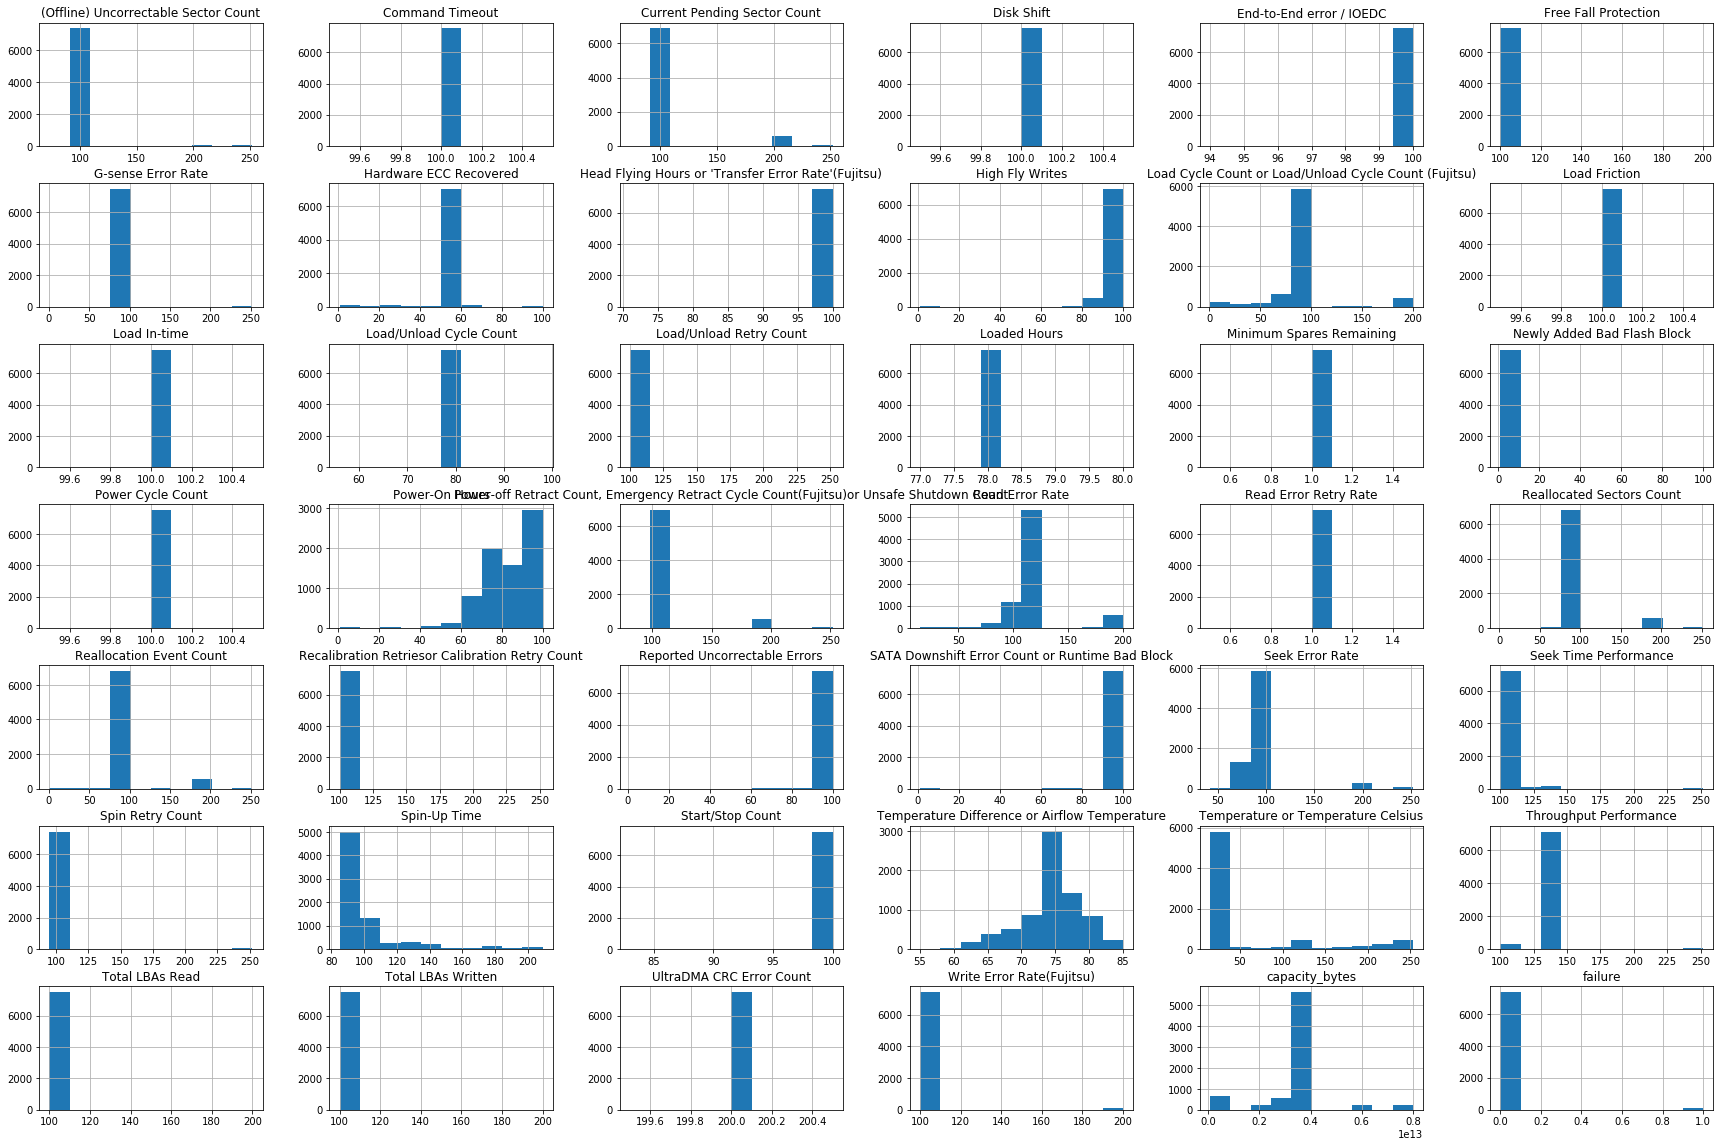

In [15]:
pd.DataFrame.hist(data.sample(frac=0.1), figsize = [30,20]);

## Task 3 Feature engineering

### Visualization of only a view features

As this data set is quite large, I googled S.M.A.R.T for the hightest feuture failure rate and used those:
- https://www.computerworld.com/article/2846009/the-5-smart-stats-that-actually-predict-hard-drive-failure.html
- https://www.usenix.org/system/files/conference/atc17/atc17-mahdisoltani.pdf


In [16]:
# create data frame with variables for model
data1 = data.filter(['failure','Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
                            'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count'], axis=1)

In [20]:
#encode ordered variables
le=LabelEncoder()
data1['failure'] = le.fit_transform(data1['failure'])

In [21]:
data1.head()

,failure,Reallocated Sectors Count,Reported Uncorrectable Errors,Command Timeout,Current Pending Sector Count,(Offline) Uncorrectable Sector Count
0,0,100.0,100.0,100.0,100.0,100.0
1,0,100.0,100.0,100.0,100.0,100.0
2,0,100.0,100.0,100.0,100.0,100.0
3,0,100.0,100.0,100.0,100.0,100.0
4,0,200.0,100.0,100.0,200.0,100.0


#### Visualizing the sub set of data 

Text(0.5,1,'S.M.A.R.T selected feature set')

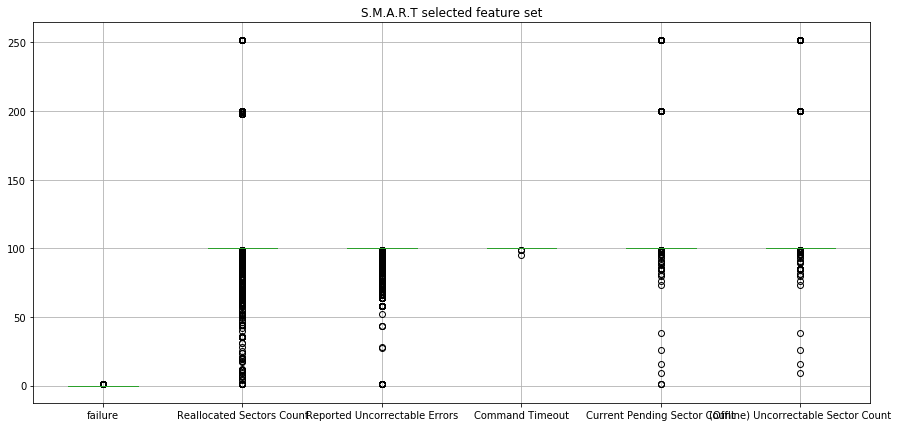

In [22]:
data1.boxplot(figsize=(15,7))
plt.title('S.M.A.R.T selected feature set')

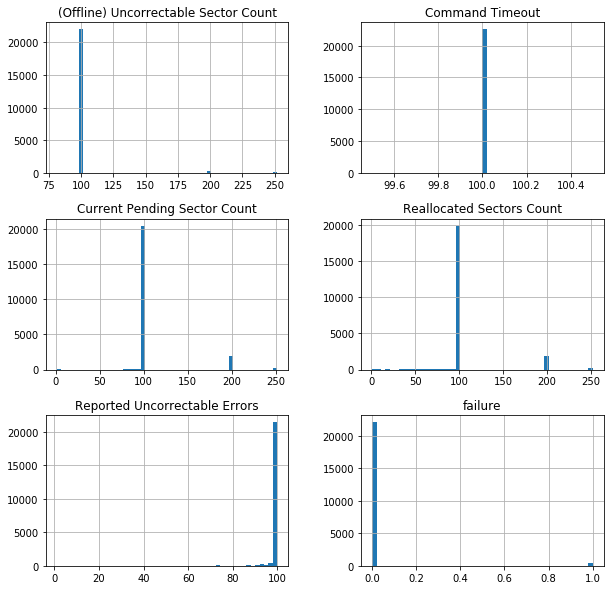

In [23]:
pd.DataFrame.hist(data1.sample(frac=0.3), figsize = [10,10], bins=50);

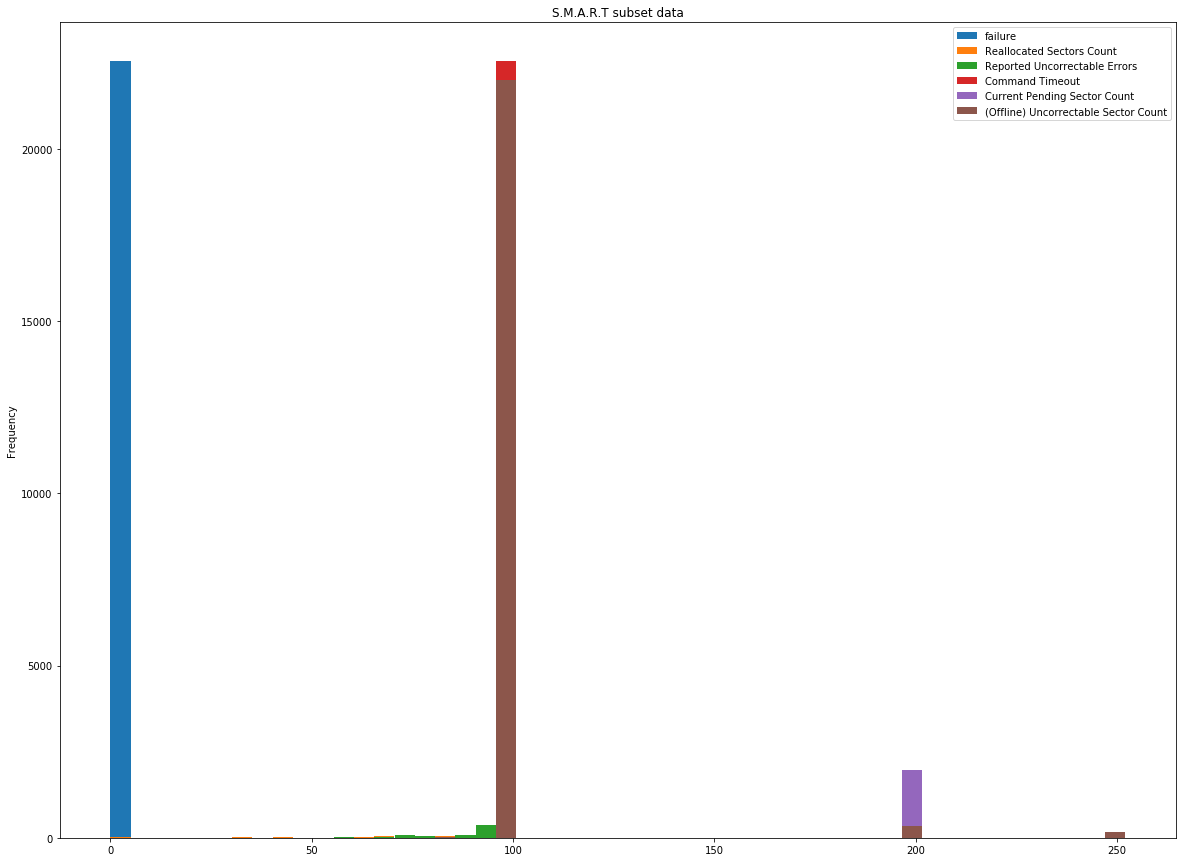

In [24]:
data1.sample(frac=0.3).plot.hist(figsize=(20,15), bins=50)
plt.title('S.M.A.R.T subset data')
plt.show()

### Visualize distribution by feature

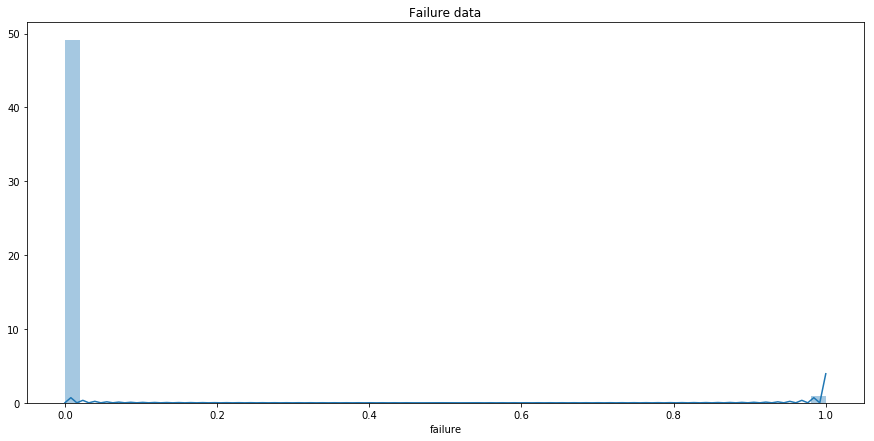

In [25]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['failure'])
plt.title('Failure data')
plt.show()

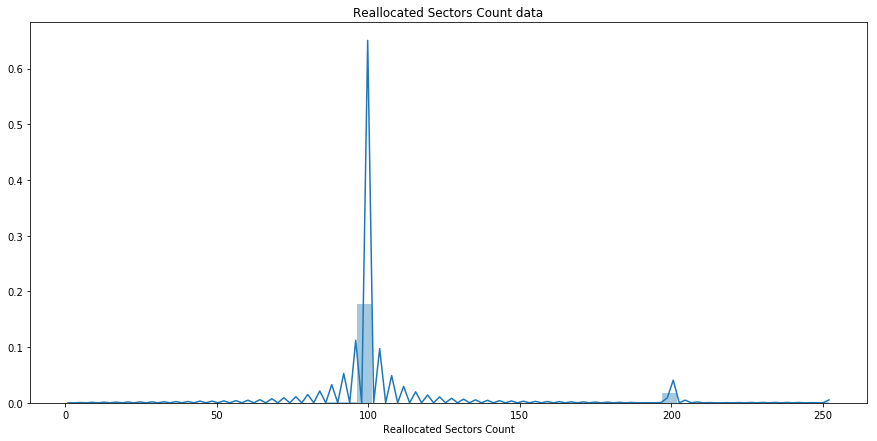

In [26]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Reallocated Sectors Count'])
plt.title('Reallocated Sectors Count data')
plt.show()

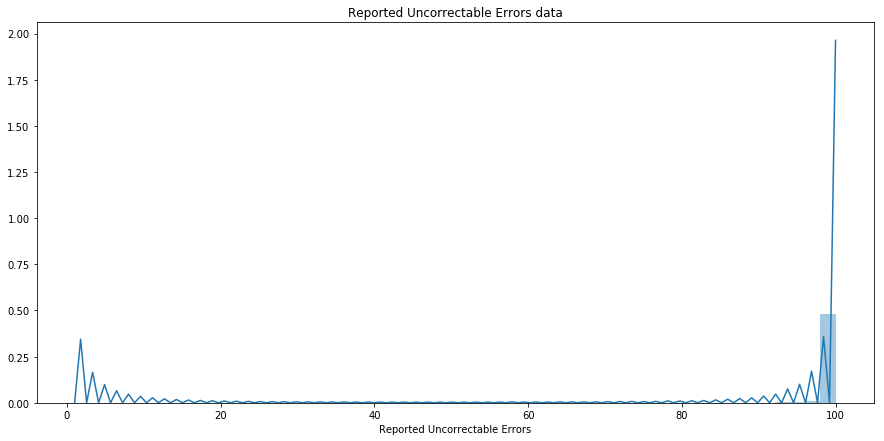

In [27]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Reported Uncorrectable Errors'])
plt.title('Reported Uncorrectable Errors data')
plt.show()

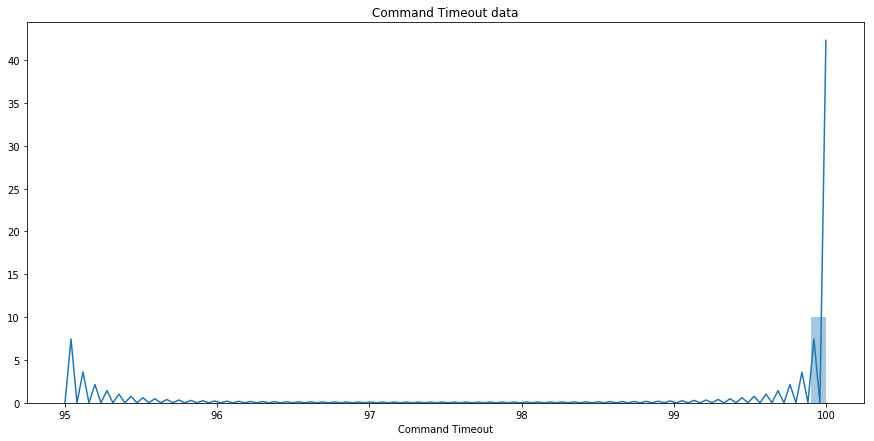

In [28]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Command Timeout'])
plt.title('Command Timeout data')
plt.show()

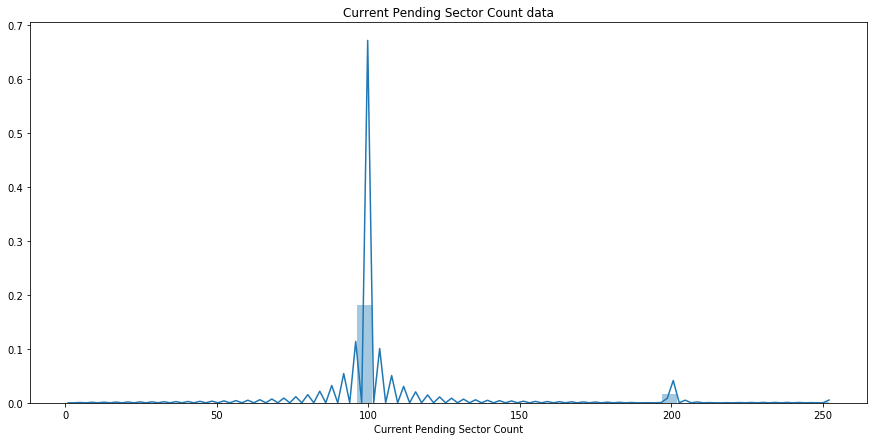

In [29]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Current Pending Sector Count'])
plt.title('Current Pending Sector Count data')
plt.show()

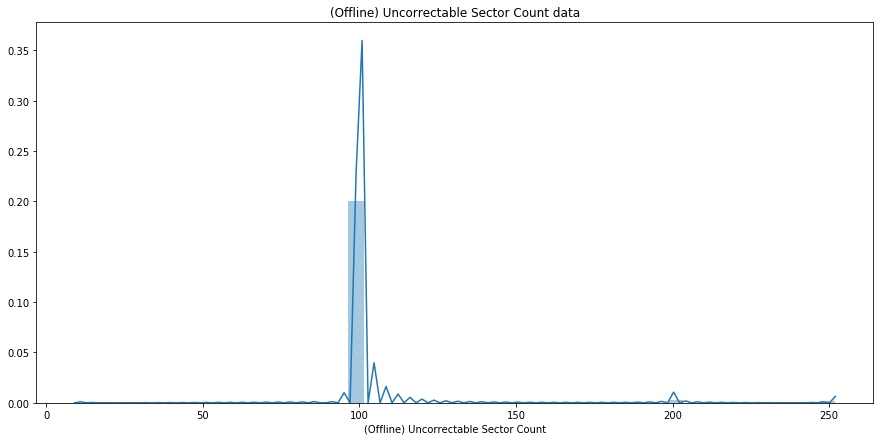

In [30]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['(Offline) Uncorrectable Sector Count'])
plt.title('(Offline) Uncorrectable Sector Count data')
plt.show()

### Regression plots

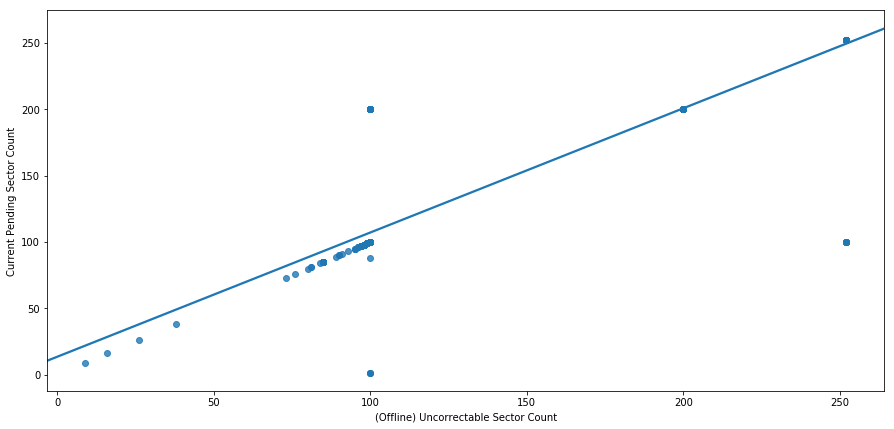

In [31]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['(Offline) Uncorrectable Sector Count'], data1['Current Pending Sector Count'])

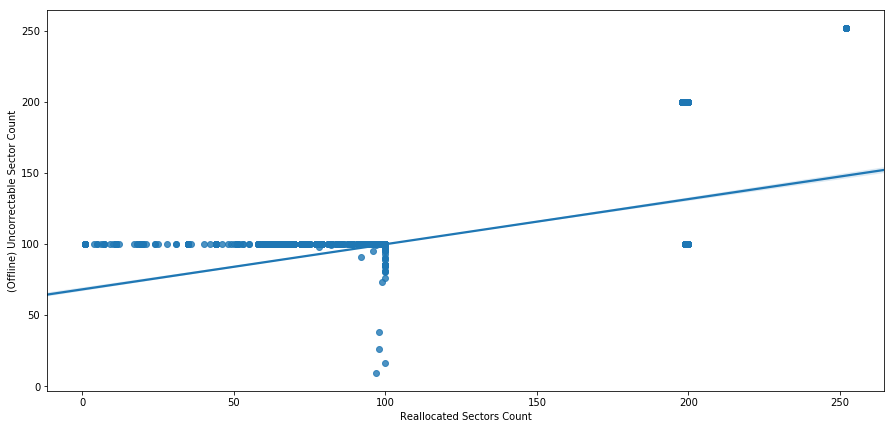

In [32]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Reallocated Sectors Count'], data1['(Offline) Uncorrectable Sector Count'])

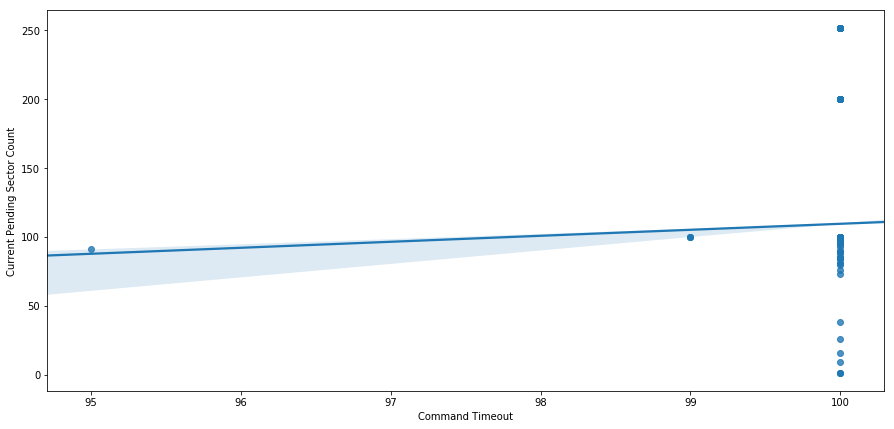

In [33]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Command Timeout'], data1['Current Pending Sector Count'])

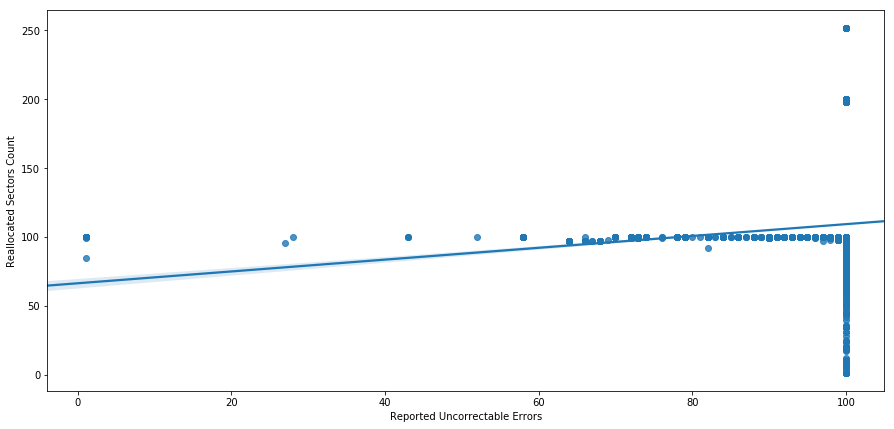

In [34]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Reported Uncorrectable Errors'], data1['Reallocated Sectors Count'])

## Task 4 Model fitting

### Decided to go with Random forest regression 

In [64]:
X = data1.drop(['failure'], axis = 1).values 
y = data1['failure'].values 

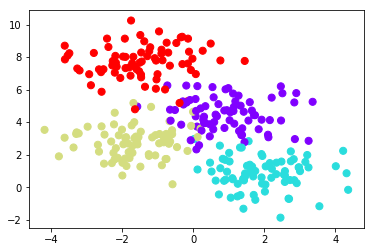

In [65]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Storing the selected features labels

In [66]:
labels = ['Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
          'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count']; labels

['Reallocated Sectors Count',
 'Reported Uncorrectable Errors',
 'Command Timeout',
 'Current Pending Sector Count',
 '(Offline) Uncorrectable Sector Count']

#### Spliting data in training and test set.

In [69]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Transforming and standardizing the data

Left below out

In [70]:
#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
model = RandomForestClassifier(n_jobs=-1)

To get some visualization of my decision tree.
Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [72]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Examine the decision tree classification - what it looks like.

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


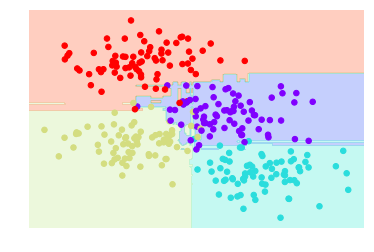

In [73]:
visualize_classifier(model, X, y);

Tried a bunch of different estimators 

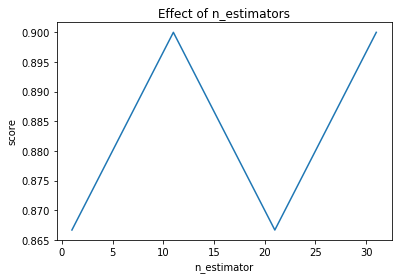

In [74]:
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### Predicting

Apply regressor to test set.

In [75]:
y_predicted = model.predict(X_test)

In [76]:
len(y_predicted), len(y_test)

(60, 60)

#### Determine accuracy

In [77]:
score = r2_score(y_test, y_predicted)
score

0.60414703110273327

#### Looking at XGBoost

In [78]:
model = xgb.XGBRegressor()

#### giving the model training data

In [79]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

#### Looking at the predictions
This did not work for me

In [80]:
y_preds = model.predict(X_test)

In [81]:
preds = [round(i) for i in y_preds]

In [82]:
from sklearn.metrics import explained_variance_score

In [83]:
print(explained_variance_score(y_preds,y_test))

0.653115082309


## Task 5 Model evaluation

#### Cross Validate the model

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [85]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.782169102628


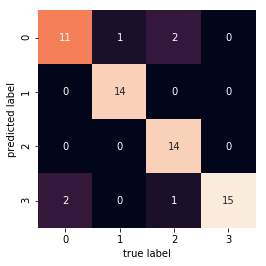

In [86]:
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

From this confusion matrix I can see that the chosen features do influence the model and have a high degree of prediction.

The accuracy score also confirms this.

Moving on to the test data set

## Task 6 Produce recommendations

#### Loading the test data

In [134]:
test_data = pd.read_csv('ml_summative_predict.csv',  sep=',', header=None, error_bad_lines=False, warn_bad_lines=False , low_memory=False)

In [135]:
test_data = pd.read_csv('ml_summative_predict.csv', sep=';')

In [136]:
test_data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-12-25,W3015JSX,ST4000DM000,"4,00079E+12",NaN,92,100,100,75,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2,2016-12-25,ZA10Q2F7,ST8000DM002,"8,00156E+12",NaN,96,100,100,86,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,70
2,3,2016-12-25,9VYC10JY,ST3160316AS,"1,60042E+11",NaN,97,100,100,87,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
3,4,2016-12-25,Z304KBY0,ST4000DM000,"4,00079E+12",NaN,94,100,100,87,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,"15,59842504"
4,5,2016-12-25,WD-WXU1E83UUNF8,WDC WD5000LPVX,"5,00108E+11",NaN,152,100,200,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Feature selection - select the same columns as the training data

In [137]:
# create data frame with variables for model
test_data_f = test_data.filter(['Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
                            'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count'], axis=1)

In [138]:
test_data_f.head()

,Reallocated Sectors Count,Reported Uncorrectable Errors,Command Timeout,Current Pending Sector Count,(Offline) Uncorrectable Sector Count
0,100,100.0,100.0,100,100
1,100,100.0,100.0,100,100
2,100,100.0,100.0,100,100
3,100,100.0,100.0,100,100
4,200,NaN,NaN,200,100


In [139]:
test_data_f.isnull().sum()

Reallocated Sectors Count                0
Reported Uncorrectable Errors           31
Command Timeout                         31
Current Pending Sector Count             0
(Offline) Uncorrectable Sector Count     0
dtype: int64

In [140]:
test_data_f = test_data_f.fillna(test_data_f.median(axis=0))

In [141]:
test_data_f.isnull().sum()

Reallocated Sectors Count               0
Reported Uncorrectable Errors           0
Command Timeout                         0
Current Pending Sector Count            0
(Offline) Uncorrectable Sector Count    0
dtype: int64

In [146]:
labels = ['Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
          'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count']; labels

['Reallocated Sectors Count',
 'Reported Uncorrectable Errors',
 'Command Timeout',
 'Current Pending Sector Count',
 '(Offline) Uncorrectable Sector Count']

In [147]:
test_dataset = test_data_f.values # X are the input (or independent) variables

In [148]:
test_dataset = test_dataset[:, None]

In [149]:
nsamples, nx, ny = test_dataset.shape
X_test = test_dataset.reshape((nsamples,nx*ny))

In [150]:
model = RandomForestClassifier(n_jobs=-1)

I was battling to get the test data to fit the training data model

In [152]:
predict = model.fit(X_test, y_test)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002E42810, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\113011371\AppData\Local\Continuum\anaco...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\1...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002E42810, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\113011371\AppData\Local\Continuum\anaco...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\1...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'predict = model.fit(X_test, y_test)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 4, 9, 12, 29, 903009, tzinfo=tzutc()), 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'session': '01cf83d24000443888a304f1bfab519f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'01cf83d24000443888a304f1bfab519f']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'predict = model.fit(X_test, y_test)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 4, 9, 12, 29, 903009, tzinfo=tzutc()), 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'session': '01cf83d24000443888a304f1bfab519f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'01cf83d24000443888a304f1bfab519f'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'predict = model.fit(X_test, y_test)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 4, 9, 12, 29, 903009, tzinfo=tzutc()), 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'session': '01cf83d24000443888a304f1bfab519f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f2d0d9db6054f8d94ed3e3a5a6c9ab0', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='predict = model.fit(X_test, y_test)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'predict = model.fit(X_test, y_test)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('predict = model.fit(X_test, y_test)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('predict = model.fit(X_test, y_test)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='predict = model.fit(X_test, y_test)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-152-93cf4586db0d>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at f721cc0, execution_co..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000000F7C10C0, file "<ipython-input-152-93cf4586db0d>", line 1>
        result = <ExecutionResult object at f721cc0, execution_co..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000000F7C10C0, file "<ipython-input-152-93cf4586db0d>", line 1>, result=<ExecutionResult object at f721cc0, execution_co..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000000F7C10C0, file "<ipython-input-152-93cf4586db0d>", line 1>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport pandas as...# for preprocessing like imputting missing values', "get_ipython().run_line_magic('matplotlib', 'inline')", "# read data file \ndata = pd.read_csv('ml_summative_raw.csv')", 'data.head()', 'data.isnull().sum()', 'data.dtypes', 'data = data.fillna(data.median(axis=0))', 'data.isnull().sum()', "data.drop('Unnamed: 0', axis=1, inplace=True)\nda...p('Soft Read Error Rateor', axis=1, inplace=True)", 'data.head()', 'data.describe()', 'data.index', 'data.shape', 'corr = data.corr()\nplt.figure(figsize=(30,30))\ns....columns.values, yticklabels=corr.columns.values)', 'pd.DataFrame.hist(data.sample(frac=0.1), figsize = [30,20]);', "# create data frame with variables for model\ndat... '(Offline) Uncorrectable Sector Count'], axis=1)", "#encode ordered variables\nle=LabelEncoder()\ndata_1['failure'] = le.fit_transform(data_1['failure'])", 'import matplotlib.pyplot as plt\nimport pandas as...es\nfrom sklearn.preprocessing import LabelEncoder', "#encode ordered variables\nle=LabelEncoder()\ndata_1['failure'] = le.fit_transform(data_1['failure'])", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {4:    Unnamed: 0        date    serial_number      ...    NaN            200.0  

[5 rows x 50 columns], 5: Unnamed: 0                                      ...                                 598
dtype: int64, 6: Unnamed: 0                                      ...                            float64
dtype: object, 8: Unnamed: 0                                      ...                                   0
dtype: int64, 10:                   model  capacity_bytes  failure...  100.0            200.0  

[5 rows x 43 columns], 11:        capacity_bytes       failure  Throughput ....000000       200.000000  

[8 rows x 42 columns], 12: RangeIndex(start=0, stop=75130, step=1), 13: (75130, 43), 14: <matplotlib.axes._subplots.AxesSubplot object>, 21:    failure  Reallocated Sectors Count  Reported ...100.0  
4                                 100.0  , ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X': array([[ 100.,  100.,  100.,  100.,  100.],
    ...9.],
       [ 100.,  100.,  100.,  100.,  100.]]), ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport pandas as...# for preprocessing like imputting missing values', "get_ipython().run_line_magic('matplotlib', 'inline')", "# read data file \ndata = pd.read_csv('ml_summative_raw.csv')", 'data.head()', 'data.isnull().sum()', 'data.dtypes', 'data = data.fillna(data.median(axis=0))', 'data.isnull().sum()', "data.drop('Unnamed: 0', axis=1, inplace=True)\nda...p('Soft Read Error Rateor', axis=1, inplace=True)", 'data.head()', 'data.describe()', 'data.index', 'data.shape', 'corr = data.corr()\nplt.figure(figsize=(30,30))\ns....columns.values, yticklabels=corr.columns.values)', 'pd.DataFrame.hist(data.sample(frac=0.1), figsize = [30,20]);', "# create data frame with variables for model\ndat... '(Offline) Uncorrectable Sector Count'], axis=1)", "#encode ordered variables\nle=LabelEncoder()\ndata_1['failure'] = le.fit_transform(data_1['failure'])", 'import matplotlib.pyplot as plt\nimport pandas as...es\nfrom sklearn.preprocessing import LabelEncoder', "#encode ordered variables\nle=LabelEncoder()\ndata_1['failure'] = le.fit_transform(data_1['failure'])", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {4:    Unnamed: 0        date    serial_number      ...    NaN            200.0  

[5 rows x 50 columns], 5: Unnamed: 0                                      ...                                 598
dtype: int64, 6: Unnamed: 0                                      ...                            float64
dtype: object, 8: Unnamed: 0                                      ...                                   0
dtype: int64, 10:                   model  capacity_bytes  failure...  100.0            200.0  

[5 rows x 43 columns], 11:        capacity_bytes       failure  Throughput ....000000       200.000000  

[8 rows x 42 columns], 12: RangeIndex(start=0, stop=75130, step=1), 13: (75130, 43), 14: <matplotlib.axes._subplots.AxesSubplot object>, 21:    failure  Reallocated Sectors Count  Reported ...100.0  
4                                 100.0  , ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X': array([[ 100.,  100.,  100.,  100.,  100.],
    ...9.],
       [ 100.,  100.,  100.,  100.,  100.]]), ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
C:\Users\113011371\<ipython-input-152-93cf4586db0d> in <module>()
----> 1 predict = model.fit(X_test, y_test)

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), y=array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 9
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Jun  4 11:12:29 2018
PID: 9072Python 3.6.4: C:\Users\113011371\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1064935472, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1064935472, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1064935472, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), y=array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1064935472, splitter='best')>
        X = array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32)
        y = array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]])
        sample_weight = None
        curr_sample_weight = array([ 0.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  ...,  0.,  4.,  3.,  1.,
        0.,  1.,  1.,  2.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1064935472, splitter='best'), X=array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), y=array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), sample_weight=array([ 0.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  ...,  0.,  4.,  3.,  1.,
        0.,  1.,  1.,  2.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1064935472, splitter='best'), X=array([[ 100.,  100.,  100.,  100.,  100.],
    ...00.,  100.,  100.,  100.,  100.]], dtype=float32), y=array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]]), sample_weight=array([ 0.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  ...,  0.,  4.,  3.,  1.,
        0.,  1.,  1.,  2.]), check_input=False, X_idx_sorted=None)
    231 
    232         self.max_features_ = max_features
    233 
    234         if len(y) != n_samples:
    235             raise ValueError("Number of labels=%d does not match "
--> 236                              "number of samples=%d" % (len(y), n_samples))
        y = array([[ 3.],
       [ 2.],
       [ 0.],
      ...[ 0.],
       [ 1.],
       [ 2.],
       [ 3.]])
        n_samples = 173
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=60 does not match number of samples=173
___________________________________________________________________________

In [153]:
predictions = model.predict(X_test)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.